In [1]:
import json
from tqdm import tqdm

In [3]:
predictions = []
for i in tqdm(range(1,112)):
    results_index_path = f"../Data/faiss/results/results_paper_{i}.json"
    with open(results_index_path, 'rb') as f:
        paper_result = json.load(f)
    predictions.append(paper_result)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 221.51it/s]


In [5]:
predictions[0]

{'MOF 1': {'MOF name': 'bio-MOF-11',
  'Predicted Stability': 'Unstable',
  'Paper id': '1'},
 'MOF 2': {'MOF name': 'bio-MOF-12',
  'Predicted Stability': 'Partially unstable',
  'Paper id': '1'},
 'MOF 3': {'MOF name': 'bio-MOF-13',
  'Predicted Stability': 'Partially unstable',
  'Paper id': '1'},
 'MOF 4': {'MOF name': 'bio-MOF-14',
  'Predicted Stability': 'Stable',
  'Paper id': '1'}}

In [4]:

predictions_dict = {}
count = 1
for d in predictions:
    for key, value in d.items():
        if value['MOF name'] != 'Not provided':
            predictions_dict[f"MOF {count}"] = value
            count += 1
print(count)
predictions_dict

416


{'MOF 1': {'MOF name': 'bio-MOF-11', 'Predicted Stability': 'Unstable'},
 'MOF 2': {'MOF name': 'bio-MOF-12', 'Predicted Stability': 'Stable'},
 'MOF 3': {'MOF name': 'bio-MOF-13', 'Predicted Stability': 'Stable'},
 'MOF 4': {'MOF name': 'bio-MOF-14', 'Predicted Stability': 'Stable'},
 'MOF 5': {'MOF name': 'MOF-74', 'Predicted Stability': 'Stable'},
 'MOF 6': {'MOF name': 'MOF-508b', 'Predicted Stability': 'Stable'},
 'MOF 7': {'MOF name': 'Zn-BDC-DABCO', 'Predicted Stability': 'Stable'},
 'MOF 8': {'MOF name': 'HKUST-1', 'Predicted Stability': 'Stable'},
 'MOF 9': {'MOF name': 'Cr-MIL-101', 'Predicted Stability': 'Stable'},
 'MOF 10': {'MOF name': 'Al-MIL-110', 'Predicted Stability': 'Not provided'},
 'MOF 11': {'MOF name': 'MIL-101', 'Predicted Stability': 'Stable'},
 'MOF 12': {'MOF name': 'MIL-101-NH2', 'Predicted Stability': 'Not provided'},
 'MOF 13': {'MOF name': 'MIL-101-SO3H', 'Predicted Stability': 'Not provided'},
 'MOF 14': {'MOF name': 'HKUST-1', 'Predicted Stability': 'U

In [5]:
not_provided_count = 0

for key in predictions_dict:
    if predictions_dict[key].get('Predicted Stability') == 'Not provided':
        not_provided_count += 1

print(not_provided_count)

124


In [31]:
import pandas as pd

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('Result/Excel/Standard_Criteria_Binary.xlsx')

# Convert the DataFrame into a dictionary for easy lookup
stability_dict = df.set_index('MOF contained')['True Water Stability'].to_dict()
ground_truth_dict = {}
# for i, (key, value) in enumerate(stability_dict.items(), start=1):
#     ground_truth_dict[f"MOF {i}"] = {'MOF name': key, 'Ground-truth Stability': value}
    
# for mof, properties in ground_truth_dict.items():
#     properties.setdefault('Predicted Stability', 'Not provided')

ground_truth_dict = {}
for i, (key, value) in enumerate(stability_dict.items(), start=1):
    ground_truth_dict[f"MOF {i}"] = {'MOF name': key, 'Ground-truth Stability': value, 'Predicted Stability': 'Not provided'}

In [32]:
ground_truth_dict

{'MOF 1': {'MOF name': 'Bio-MOF-14',
  'Ground-truth Stability': 'Stable',
  'Predicted Stability': 'Not provided'},
 'MOF 2': {'MOF name': 'Bio-MOF-13',
  'Ground-truth Stability': 'Stable',
  'Predicted Stability': 'Not provided'},
 'MOF 3': {'MOF name': 'Bio-MOF-12',
  'Ground-truth Stability': 'Unstable',
  'Predicted Stability': 'Not provided'},
 'MOF 4': {'MOF name': 'Bio-MOF-11',
  'Ground-truth Stability': 'Unstable',
  'Predicted Stability': 'Not provided'},
 'MOF 5': {'MOF name': 'MIL-101(Cr)',
  'Ground-truth Stability': 'Stable',
  'Predicted Stability': 'Not provided'},
 'MOF 6': {'MOF name': 'ZIF-8',
  'Ground-truth Stability': 'Stable',
  'Predicted Stability': 'Not provided'},
 'MOF 7': {'MOF name': 'MIL-53(Al)',
  'Ground-truth Stability': 'Stable',
  'Predicted Stability': 'Not provided'},
 'MOF 8': {'MOF name': 'HKUST-1',
  'Ground-truth Stability': 'Unstable',
  'Predicted Stability': 'Not provided'},
 'MOF 9': {'MOF name': 'Zn-MOF-74',
  'Ground-truth Stability': '

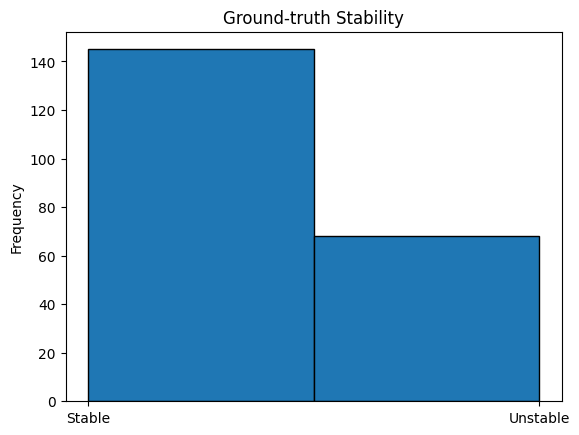

In [35]:
import matplotlib.pyplot as plt

# Extract Ground-truth Stability values
stability_values = [entry['Ground-truth Stability'] for entry in ground_truth_dict.values()]

# Create histogram
plt.hist(stability_values, bins=2, edgecolor='black')
plt.ylabel('Frequency')
plt.title('Ground-truth Stability')
plt.show()

In [8]:
# def merge_dictionaries(ground_truth_dict, predictions_dict):
#     # Convert dictionaries to dataframes and set 'MOF name' as index
#     df1 = pd.DataFrame(ground_truth_dict).T.set_index('MOF name')
#     df2 = pd.DataFrame(predictions_dict).T.set_index('MOF name')

#     # Merge dataframes
#     merged_df = df1.join(df2)

#     # Reset index and map index back to original dictionary keys
#     merged_df.reset_index(inplace=True)
#     merged_df.index = [f'MOF {i+1}' for i in range(len(merged_df))]

#     # Convert back to nested dictionary
#     merged_dict = merged_df.T.to_dict()

#     return merged_dict

# all_data = merge_dictionaries(ground_truth_dict, predictions_dict)

In [18]:
# Iterate through all items in ground_truth_dict
for gt_key, gt_value in ground_truth_dict.items():
    # Iterate through all items in predictions_dict
    for pred_key, pred_value in predictions_dict.items():
        # Check if 'MOF name' values are the same
        if gt_value['MOF name'].lower() == pred_value['MOF name'].lower():  # the comparison is case insensitive
            # Update the 'Predicted Stability' value in ground_truth_dict
            gt_value['Predicted Stability'] = pred_value['Predicted Stability']




In [21]:
# Get list of MOF names in the ground truth dictionary
ground_truth_names = [value['MOF name'] for value in ground_truth_dict.values()]

# Get list of MOF names in the predictions dictionary
predicted_names = [value['MOF name'] for value in predictions_dict.values()]

# Count non-matching names
non_matching_names = len(set(ground_truth_names) - set(predicted_names))

print(non_matching_names)

132


In [22]:
y = []
y_hat = []
for k, v in ground_truth_dict.items():
    if v['Predicted Stability'] != 'Not provided':
        if v['Ground-truth Stability'] == 'Stable':
            y.append(1)
        else:
            y.append(0)
        if v['Predicted Stability'] == 'Stable':
            y_hat.append(1)
        else:
            y_hat.append(0)
    else:
        count


In [23]:
len(y)

70

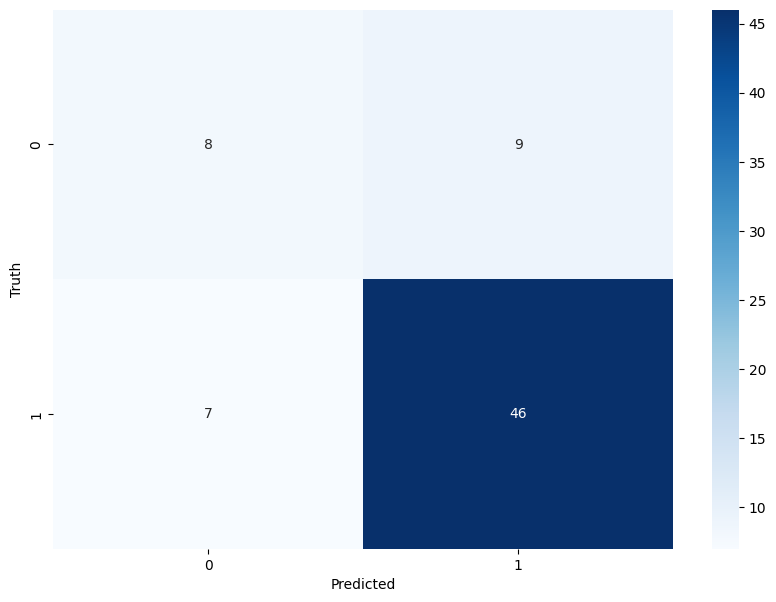

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Confusion Matrix
cm = confusion_matrix(y, y_hat)

plt.figure(figsize=(10,7))

# Using seaborn to plot heatmap, annot=True to annotate the numbers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [25]:
from sklearn.metrics import accuracy_score
# Calculate Accuracy
acc = accuracy_score(y, y_hat)

print(f"Accuracy: {acc:.03f}")

Accuracy: 0.771


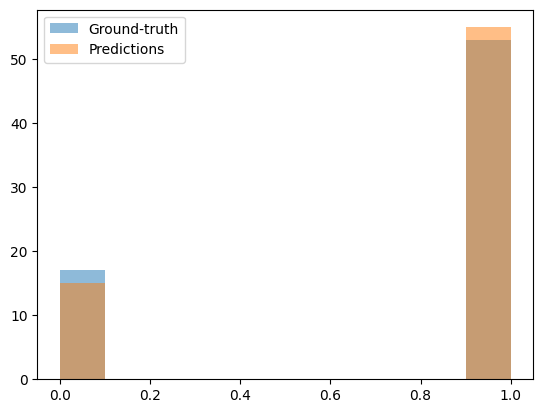

In [26]:
plt.hist(y, label='Ground-truth', alpha=0.5)
plt.hist(y_hat, label='Predictions', alpha=0.5)
plt.legend()